![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)
***
# *Practicum AI:* Transfer - Introduction

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (page 148).

(10 Minutes)

#### Introduction
This exercise illustrates the steps taken during transfer learning.  However, data to retrain the model is not provided, though example code for training is given.

This Hugging Face video reviews the basics of *Transfer Learning* and is worth watching before you start the exercise.

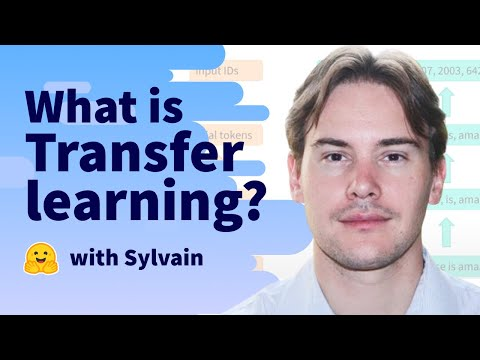

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('BqqfQnyjmgg')

#### 1. Import requisite libraries and VGG16 model
The VGG16 model is a variant of the VGG19 model we encountered in the hot dog transfer learning exercise.  Both models were trained on the famous ImageNet dataset.  A list of [pre-trained models](https://www.tensorflow.org/api_docs/python/tf/keras/applications) is available in the TensorFlow documentation. 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import VGG16

2022-02-16 11:14:52.382737: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


#### 2. Define the input dimensions of the images
This is where you define the size of the images in *your* dataset.

In [4]:
img_dim = (100, 100, 3)

#### 3. Instantiate the model

We now instantiate the model.  The **include_top = True** parameter indicates that we will be using the same last layers to predict ImageNet's 20,000 categories of images.  

<div style="padding: 10px;margin-bottom: 20px;border: thin solid #30335D;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> You may encounter an error (often related to memory) when instantiating the model in this block. If that happens, restart the kernel and execute these first three blocks again. That usually fixes the problem. </div>

```python
base_model = VGG16(input_shape = img_dim, weights = 'imagenet', 
                   include_top = True)
```

In [1]:
# Code it!

#### 4. Use the model to make a prediction

<div style="padding: 10px;margin-bottom: 20px;border: thin solid #30335D;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> The code in the next two blocks is for demonstration purposes and has not been tested.  The basic idea is to load an image and then run the predict() method on it.  You will want to investigate the data input format requirements of the VGG16 model to ensure your image conforms to the way the model expects data to be presented to it.</div>

```python
input_img = load_img('images/image_file_name.png', target_size = (224, 224))

base_model.predict(input_img)
```

In [ ]:
# Code it!

In [11]:
# Code it!

#### 5. Remove the last layer

But what if we want to use this pretrained model to predict different classes other
than the ones from ImageNet? In that case, we replace the last fully connected layers of the pretrained models used for prediction and train them on the new classes. These last few layers are called the top (or head) of the model. We do this by specifying **include_top = False**:

```python
base_model = VGG16(input_shape = img_dim, weights = 'imagenet', 
                   include_top = False)
```

In [2]:
# Code it!

#### 6. Freeze the rest of the model
Freeze the base model so it cannot be trained.

```python
base_model.trainable = False
```

In [3]:
# Code it!

#### 7. Create a new prediction layer with 20 output and softmax activation
Because our hypothetical dataset contains 20 different kinds of images, we create a fully-connected (dense) layer with 20 units and a softmax activation function.

```python
prediction_layer = tf.keras.layers.Dense(20, activation = 'softmax')
```

In [4]:
# Code it!

#### 8. Append the new prediction layer to the base model
Add the new prediction layer to the base model.

```python
new_model = tf.keras.Sequential([base_model, prediction_layer])
```

In [5]:
# Code it!

#### 9. Create an Adam optimizer and compile the model
After this step, verify the model's architecture using the `.summary` method.

```python
optimizer = tf.keras.optimizers.Adam(0.001)

new_model.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizer, 
                  metrics   = ['accuracy'])
```

In [6]:
# Code it!

#### 10. Fit (train) the model

<div style="padding: 10px;margin-bottom: 20px;border: thin solid #30335D;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> The code in the next block is for demonstration purposes only as the features_train and label_train variables are undefined.</div>

In [ ]:
new_model.fit(features_train, label_train, epochs = 5, validation_split = 0.2, verbose = 2)